<a href="https://colab.research.google.com/github/priyadarshi0007/TimeSeries-AIEngineering/blob/master/Incorporating_Holiday_In_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')

In [3]:
df['Quarter'] = pd.to_datetime(df['Quarter'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [5]:
def printStats(dataframe):
  print("Rows     :", dataframe.shape[0])
  print("Columns  :", dataframe.shape[1])
  print("\n Features \n", dataframe.columns.to_list())
  print("\n Missing Values \n", dataframe.isnull().any())
  print("\n Unique Values \n", dataframe.nunique())

In [6]:
printStats(df)

Rows     : 61
Columns  : 3

 Features 
 ['Quarter', 'Revenue', 'Net Income']

 Missing Values 
 Quarter       False
Revenue       False
Net Income    False
dtype: bool

 Unique Values 
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [9]:
fig = px.line(df, x = 'Quarter',y = 'Revenue',title = 'Amazon_Profits')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [10]:
from fbprophet import Prophet

In [11]:
amazon_df = df.reset_index()[['Quarter','Revenue']].rename({'Quarter':'ds','Revenue':'y'}, axis='columns')

In [12]:
amazon_df

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700
...,...,...
56,2006-03-31,2279
57,2005-12-31,2977
58,2005-09-30,1858
59,2005-06-30,1753


In [13]:
train = amazon_df[(amazon_df['ds']>='2005-03-31') & (amazon_df['ds']<='2019-03-3')]
test = amazon_df[(amazon_df['ds']>'2019-03-3')]

In [14]:
train.shape

(56, 2)

In [15]:
test.shape

(5, 2)

In [16]:
m = Prophet(interval_width=0.95)

In [17]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = m.make_future_dataframe(periods=4,freq='Q')
future.tail()

,ds
55,2018-12-31
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31


In [19]:
forecast = m.predict(future)

In [22]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
55,2018-12-31,65180.679296,61059.957203,69184.941697
56,2019-03-31,61937.862515,57655.104639,66040.358616
57,2019-06-30,63821.627330,59703.146518,67820.540403
58,2019-09-30,66642.198741,62694.977777,70977.976210
59,2019-12-31,74885.656740,70919.280351,79119.501769


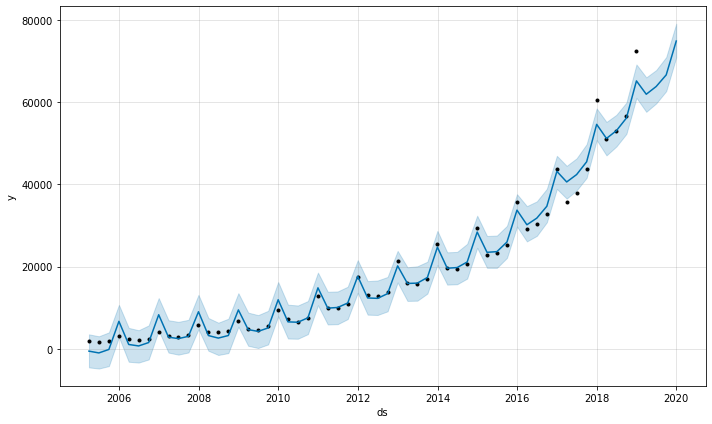

In [23]:
fig1 = m.plot(forecast)

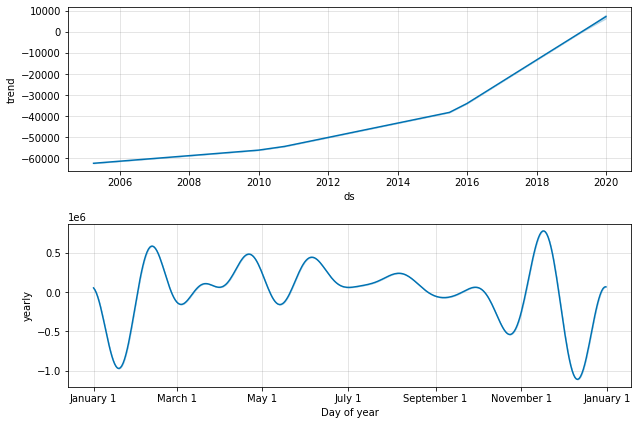

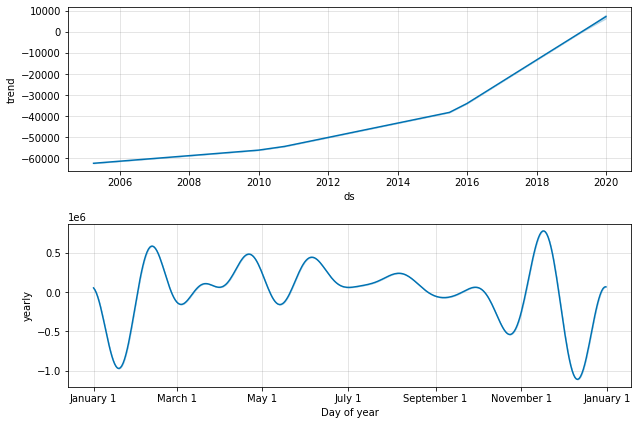

In [25]:
m.plot_components(forecast)

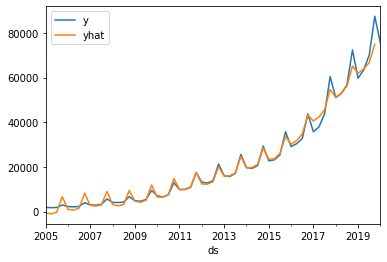

In [26]:
pd.concat([amazon_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [27]:
holiday_sale = pd.DataFrame({
  'holiday': 'dec_jan_sale',
  'ds': pd.to_datetime(['2019-12-31',
                        '2018-12-31',
                        '2017-12-31',
                        '2016-12-31',
                        '2015-12-31',
                        '2014-12-31',
                        '2013-12-31',
                        '2012-12-31',
                        '2011-12-31',
                        '2010-12-31',
                        '2009-12-31',
                        '2008-12-31',
                        '2007-12-31',
                        '2006-12-31',
                        '2005-12-31']),
  'lower_window': 0,
  'upper_window': 1,
})

In [28]:
holiday_sale

,holiday,ds,lower_window,upper_window
0,dec_jan_sale,2019-12-31,0,1
1,dec_jan_sale,2018-12-31,0,1
2,dec_jan_sale,2017-12-31,0,1
3,dec_jan_sale,2016-12-31,0,1
4,dec_jan_sale,2015-12-31,0,1
5,dec_jan_sale,2014-12-31,0,1
6,dec_jan_sale,2013-12-31,0,1
7,dec_jan_sale,2012-12-31,0,1
8,dec_jan_sale,2011-12-31,0,1
9,dec_jan_sale,2010-12-31,0,1


In [31]:
m2 = Prophet(holidays=holiday_sale,seasonality_mode='multiplicative', interval_width=0.95)
#future = m2.make_future_dataframe(periods=90)
#forecast = m2.predict(future)
#m2.plot(forecast)

In [32]:
m2.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
forecast = m2.predict(future)

In [34]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
55,2018-12-31,74214.239454,72485.600033,76126.737049
56,2019-03-31,61203.042056,59377.755936,62981.914208
57,2019-06-30,62911.263244,61126.251541,64704.746373
58,2019-09-30,67333.696352,65440.793907,69338.952844
59,2019-12-31,89586.956344,87398.047459,91876.415666


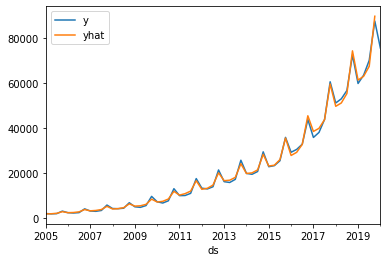

In [35]:
pd.concat([amazon_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

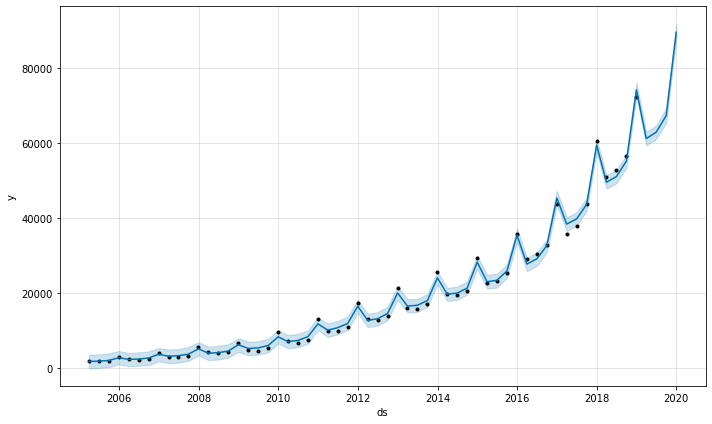

In [36]:
fig2 = m2.plot(forecast)

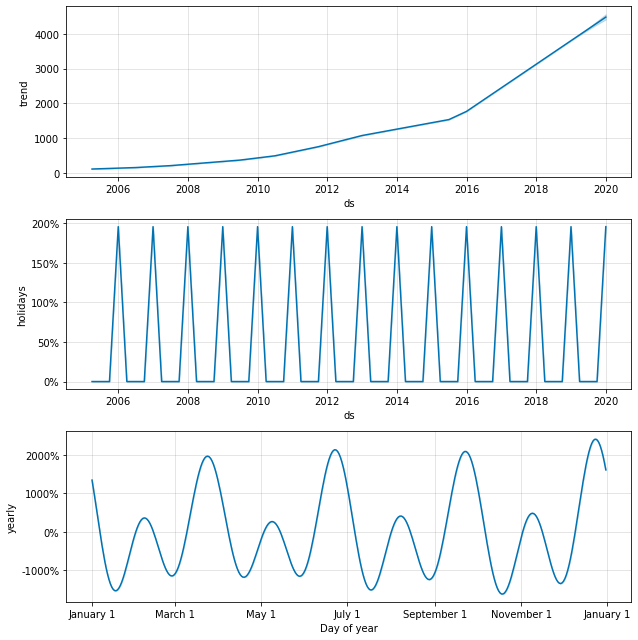

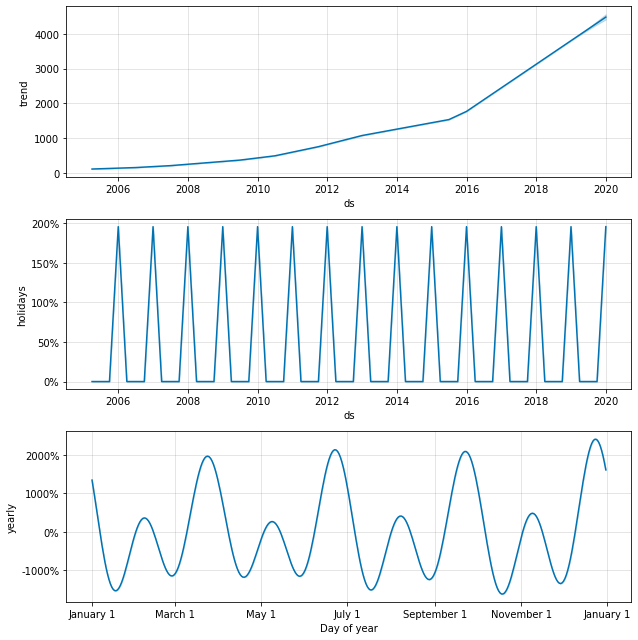

In [37]:
m2.plot_components(forecast)